In [1]:
# install packages
!python -m pip install sklearn
!python -m pip install seaborn
!python -m pip install xgboost

In [2]:
# import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

In [3]:
# load the dataset
df = pd.read_csv("data/filetered_churn_data.csv", index_col=0)

In [4]:
# check data
df.head()

,passengerid,total_trip_count,sum_delay,sum_distance,sum_fare,sum_discount,sum_trip_fare,churn,august_trip_count,july_trip_count,june_trip_count
0,100010,28,279.58,205.86,10264.76,0.0,10264.76,No,13,9,6
1,100140,2,8.88,6.68,315.55,0.0,315.55,Yes,0,2,0
2,100227,5,30.77,29.29,1187.39,150.0,1037.37,Yes,0,3,2
3,100263,2,0.58,1.34,113.82,0.0,113.82,Yes,0,1,1
4,100553,1,8.72,8.23,314.81,0.0,314.81,Yes,0,0,1


In [5]:
# number of rows and columns
df.shape

(409353, 11)

In [6]:
# data types of columns
df.dtypes

passengerid            int64
total_trip_count       int64
sum_delay            float64
sum_distance         float64
sum_fare             float64
sum_discount         float64
sum_trip_fare        float64
churn                 object
august_trip_count      int64
july_trip_count        int64
june_trip_count        int64
dtype: object

In [7]:
# check data
print(df[(df["august_trip_count"] == 0) & (df["july_trip_count"] == 0) & (df["june_trip_count"] == 0)].shape)
print(df[(df["august_trip_count"] == 0) & (df["july_trip_count"] == 0)].shape)
print(df[df["august_trip_count"] == 0].shape)

(0, 11)
(80664, 11)
(249243, 11)


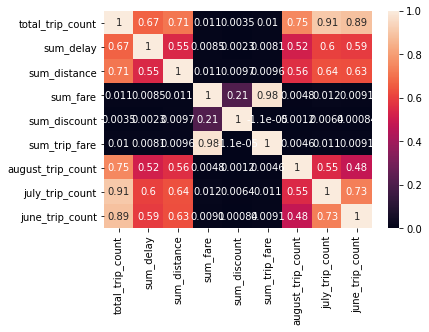

In [8]:
# correlation matrix
df_corr = df[["total_trip_count", "sum_delay", "sum_distance", "sum_fare", "sum_discount", 
              "sum_trip_fare", "august_trip_count", "july_trip_count", "june_trip_count"]]
sns.heatmap(df_corr.corr(method='pearson'), annot=True)
plt.show()

### Data formatting

In [9]:
# convert a churn variable as category 
df["churn"] = df["churn"].astype('category')
df["churn"] = df["churn"].cat.codes

In [10]:
# check data types of columns
df.dtypes

passengerid            int64
total_trip_count       int64
sum_delay            float64
sum_distance         float64
sum_fare             float64
sum_discount         float64
sum_trip_fare        float64
churn                   int8
august_trip_count      int64
july_trip_count        int64
june_trip_count        int64
dtype: object

In [11]:
# define dependant and independant variables (the total_trip_count variable is removed because its coefficient)
X = df.drop(["passengerid", "total_trip_count", "august_trip_count", "churn"], axis=1)
y = df["churn"].values

In [12]:
# check independant variables
X.head()

,sum_delay,sum_distance,sum_fare,sum_discount,sum_trip_fare,july_trip_count,june_trip_count
0,279.58,205.86,10264.76,0.0,10264.76,9,6
1,8.88,6.68,315.55,0.0,315.55,2,0
2,30.77,29.29,1187.39,150.0,1037.37,3,2
3,0.58,1.34,113.82,0.0,113.82,1,1
4,8.72,8.23,314.81,0.0,314.81,0,1


In [13]:
# check y
y

array([0, 1, 1, ..., 1, 0, 0], dtype=int8)

In [14]:
# perform scaler transform of the data
scaler = StandardScaler()
X = scaler.fit_transform(X)
# convert the array back to a dataframe
X = pd.DataFrame(X)
X.columns = ["sum_delay", "sum_distance", "sum_fare", "sum_discount", "sum_trip_fare", 
            "july_trip_count", "june_trip_count"]

In [15]:
# check data after scaler transform
X.head()

,sum_delay,sum_distance,sum_fare,sum_discount,sum_trip_fare,july_trip_count,june_trip_count
0,1.327936,0.851719,-0.005194,-0.002174,-0.004841,0.945999,0.463194
1,-0.346430,-0.378228,-0.007735,-0.002174,-0.007442,-0.222563,-0.546582
2,-0.211033,-0.238610,-0.007512,-0.001995,-0.007253,-0.055626,-0.209990
3,-0.397768,-0.411202,-0.007786,-0.002174,-0.007495,-0.389501,-0.378286
4,-0.347420,-0.368656,-0.007735,-0.002174,-0.007442,-0.556438,-0.378286


### Model building

In [16]:
# test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
# training and predicting - logistic regression
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train,y_train)
y_pred = logistic_reg.predict(X_test)

# model accuracy
print("Accuracy:", round(metrics.accuracy_score(y_test, y_pred),2))

Accuracy: 0.71


In [18]:
# training and predicting - random forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_test)

# model accuracy
print("Accuracy:", round(metrics.accuracy_score(y_test, y_pred),2))

Accuracy: 0.82


In [19]:
# training and predicting - gradient boosting
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=0)
gb_clf.fit(X_train,y_train)
y_pred = gb_clf.predict(X_test)

# model accuracy
print("Accuracy:", round(metrics.accuracy_score(y_test, y_pred),2))

Accuracy: 0.81


In [20]:
# training and predicting - xgboost
xgb_clf = XGBClassifier(random_state=0)
xgb_clf.fit(X_train,y_train)
y_pred = xgb_clf.predict(X_test)

# model accuracy
print("Accuracy:", round(metrics.accuracy_score(y_test, y_pred),2))

Accuracy: 0.83


### Findings
####  * After comparing the above models on the accuracy, the xgboost model performs better than the other models.  

### Further work
#### * Parameter tuning can be performed for the XGBClassifier to increase its performance. 